<a href="https://colab.research.google.com/github/sergiogf93/MetNumerics/blob/master/notebooks/03_ConfidenceIntervals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Computació d'intervals de confiança
===

Sabem que l'error de la mitjana d'una població segueix una $t$-Student per $N$ petit. Què fem si volem un interval de confiança on es trobi el valor real de la mitjana?


$$P(a < \mu < b) = 0.95$$

Una simplificació immediata que podem fer és que sabem que $\mu$ estarà centrada a $\bar{x}$ simètricament.

$$P( \bar{x} - y < \mu<  \bar{x} + y) = 0.95$$

on $y$ és un nombre que volem trobar. Això es pot rescriure com:

$$P( \frac{- y}{\sigma_x / \sqrt{N}} < \frac{\mu - \bar{x}}{\sigma_x / \sqrt{N}}<  \frac{y}{\sigma_x / \sqrt{N}}) = 0.95$$

que sabem que està distribuït com la $t$-Student. Noteu que això són probabilitats, que corresponen a l'integral de la densitat de probabilitat.


A continació visualitzem quin és l'objectiu. Noteu que aquí es troba la resposta al problema per poder fer la gràfica així que espereu fins més tard per entendre el codi!


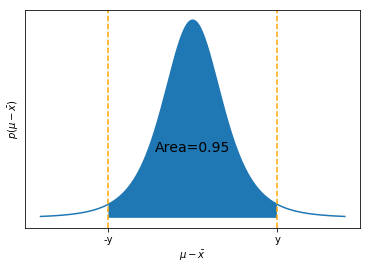

In [1]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt

#make some points for plot
N = 5
x = np.linspace(-5,5, 1000)
T = ss.t.ppf(0.975, df=N-1)
y = ss.t.pdf(x, df=N-1)
plt.plot(x,y)  
plt.fill_between(x, y, where= np.abs(x) < T)
plt.text(0,np.max(y) / 3, 'Area=0.95', fontdict={'size':14}, horizontalalignment='center')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='orange')
plt.xticks([-T, T], ['-y', 'y'])
plt.yticks([])
plt.ylabel(r'$p(\mu - \bar{x})$')
plt.xlabel(r'$\mu - \bar{x}$')
plt.show()

La idea és que sabem que $p(\frac{\mu - \bar{x}}{\sigma_x /\sqrt{N}} \sim T(0, 1)$ i per tant necessitem el percentil $T$ corresponent al nivell de confiança que volem.




$$T(s) = \frac{s - 0}{\sigma_x / \sqrt{N}}$$

La mitjana del error en la distribució de la mitjana de la població és 0, ja que el nostre error en la mitjana de la població està semple centrat a 0.

Suposem que després de pendre 5 mostres, hem trobat que la mitjana mostral és 45 i que la desviació estàndard de la mostra és $\sigma_x = 3$. Quin és l'interval de confiança de $\mu$ a un nivell de confiança del 95%?

Com hem vist abans:

$$P( \frac{- y}{\sigma_x / \sqrt{N}} < \frac{\mu - \bar{x}}{\sigma_x / \sqrt{N}}<  \frac{y}{\sigma_x / \sqrt{N}}) = 0.95$$

El nostre interval anirà de 2.5% a 97.5% (95% de probabilitat), així doncs, hem de trobar el $T$-valor per $[-\infty,2.5]$ i de $[97.5, \infty]$. Recordeu que el $T$-valor depèn dels graus de llibertat N-1.

In [2]:
import scipy.stats

#The lower T Value. YOU MUST GIVE THE SAMPLE NUMBER
print(scipy.stats.t.ppf(0.025, 4))
print(scipy.stats.t.ppf(0.975, 4))

-2.7764451051977996
2.7764451051977987


$$|T| = \frac{y - 0}{\sigma_x / \sqrt{N}}$$
$$|T| = \frac{y}{\sigma_x / \sqrt{N}}$$

$$y = |T|\frac{\sigma_x}{\sqrt{N}}$$

In [4]:
print(abs(scipy.stats.t.ppf(0.025, 4)) * 3 / np.sqrt(5))

3.7249919946113006


La resposta final és $P(45 - 3.72 < 45 < 45 + 3.72) = 0.95$ $\Rightarrow$ $45\pm 3.72$

Pasos pel càlcul d'intervals de confiança per la mitjana d'una població
====

1. Si la mida de la mostra és més gran que 25 o coneixes la desviació estàndard de la població utilitza la normal ($Z$). En cas contrari, fes servir la $t$-Student ($T$).
2. Construeix l'interval en probabilitat. Per exemple, 95% simètric va de 2.5% a 97.5%
3. Troba el $Z$ o $T$ valor que corresponen a l'interval. Per exemple, $Z_{low} = -1.96$, $Z_{high} = 1.96$ per un inverval simètric de 95% de confiança. Pots utilitzar funcions `scipy.stats.norm.ppf` o `scipy.stats.t.ppf` per trobar-los.
4. Utilitza l'equació $Z(s) = |s| \cdot\sigma_x/\sqrt{N}$ or $T(s) = |s|\cdot \sigma_x/\sqrt{N}$ per trobar els valors de l'interval.
5. Presenta la resposta en forma d'interval o amb la notació $\pm$.


Exercici 1
====
Escriu el codi en Python que fa aquests pasos per una mostra que segueix una normal $\mathcal{N}(\mu=50,\sigma=15)$ amb $N=4$.



In [0]:
?np.mean

In [0]:
?np.var

In [0]:
data = scipy.stats.norm.rvs(size=4, scale=15, loc=50)

# Escriu un codi que trobi l'interval de confiança per \mu al 95% a partir de data.
# Com que N = 4, haurem d'utilitzar T


In [0]:
#@title
data = scipy.stats.norm.rvs(size=4, scale=15, loc=50)
CI = 0.95
sample_mean = np.mean(data)
sample_var = np.var(data, ddof=1) 
T = scipy.stats.t.ppf((1 - CI) / 2, df=len(data)-1)
y = abs(T) * np.sqrt(sample_var / len(data))

print('{} +/ {}'.format(sample_mean, y))
                             

Exercici 2
====

Escriu el codi en Python que fa aquests pasos per una mostra que segueix una normal $\mathcal{N}(\mu=50,\sigma=15)$ amb $N=100$.


In [0]:
data = scipy.stats.norm.rvs(size=100, scale=15, loc=50)

# Escriu un codi que trobi l'interval de confiança per \mu al 95% a partir de data.
# Com que N = 100, podem fer servir el TLC i fer servir Z en comptes de T.

In [0]:
#@title
data = scipy.stats.norm.rvs(size=100, scale=15, loc=50)
#Check if sample size is big enough.
#This code will cause an error if it's not
assert len(data) > 25 

CI = 0.95
sample_mean = np.mean(data)
#The second argument specifies what the denominator should be (N - x),
#where x is 1 in this case
sample_var = np.var(data, ddof=1) 
Z = scipy.stats.norm.ppf((1 - CI) / 2)
y = abs(Z) * np.sqrt(sample_var / len(data))

print('{} +/ {}'.format(sample_mean, y))

                            

Exemple de predicció d'intervals
====

Si *sabem* que el gruix d'una llosa metàl·lica segueix una distribució ${\cal N}(3.4, 0.75)$, construeix un interval de predicció tal que si escollim aleatòriament una llosa es trobarà dins l'interval amb un nivell de confiança del 95%.

$$P( \mu - y < x < \mu + y) = 0.95$$

Aquest serà un interval de predicció. Així doncs, estem calculant un interval sobre la distribució mateixa la qual coneixem completament.

Resposta
--

$$Z(\mu + y) = \frac{\mu + y - \mu}{\sigma} \Rightarrow y = \sigma Z$$

$$Z = 1.96$$

$$x = \mu \pm 1.96 \sigma = 3.4 \pm 1.40$$

Una llosa escollida aleatòriament tindrà un gruix de $3.4 \pm 1.40$ el 95% de les vegades.

Exercici 3
====

Mesurem el gruix de 35 lloses i calculem $\bar{x} = 3.38$. Si sabem que $\sigma = 0.75$, construeix l'interval de confiança que conté la mitjana real $\mu$ amb 99.9% de confiança.


Sabem que $p(\bar{x} - \mu) \sim {\cal N}(0, \sigma / \sqrt{N})$. Volem trobar

$$ P(-y < \bar{x} - \mu < +y) = 0.999$$

Resposta
--

In [0]:
#Escriu aquí el codi

In [0]:
#@title
N = 35
sample_mean = 3.38
sample_sigma = 0.75
CI = 0.999
Z = abs(scipy.stats.norm.ppf((1 - CI) / 2))
y = Z*sample_sigma/np.sqrt(N)
print("Z = {}".format(Z))
print("mu = {} +/- {}".format(sample_mean,y))


Amb un nivell de confiança del 99.9%, $\mu$ es troba a $3.38 \pm 0.417$.


Exercici 4
====

Mesurem el gruix d'11 lloses i trobem que $\bar{x} = 5.64$. Si sabem que $\sigma=1.2$, construeix l'interval de confiança que conté $\mu$ amb 99% de confiança.

Com abans $p(\bar{x} - \mu) \sim {\cal N}(0, \sigma / \sqrt{N})$. Volem

$$ P(-y < \bar{x} - \mu < +y) = 0.99$$

Resposta
--

In [0]:
#Escriu aquí el codi

In [0]:
#@title
N = 11
sample_mean = 5.64
sample_sigma = 1.2
CI = 0.99
Z = abs(scipy.stats.t.ppf((1 - CI) / 2,N-1))
y = Z*sample_sigma/np.sqrt(N)
print("Z = {}".format(Z))
print("mu = {} +/- {}".format(sample_mean,y))


Exercici 5
====

Mesurem el gruix de 6 lloses de metall i trobem $\bar{x} = 3.65$ i $\sigma_x = 1.25$. Construeix l'interval de confiança que conté $\mu$ un 90% de les vegades.


Resposta
--

In [0]:
#Escriu el teu codi aquí

In [0]:
#@title
N = 6
sample_mean = 3.65
sample_sigma = 1.25
CI = 0.9
Z = abs(scipy.stats.t.ppf((1 - CI) / 2,N-1))
y = Z*sample_sigma/np.sqrt(N)
print("Z = {}".format(Z))
print("mu = {} +/- {}".format(sample_mean,y))


Exercici 6
====

Mesurem el gruix de 25 lloses de metall i trobem $\bar{x} = 3.42$ i $\sigma_x = 0.85$. Construeix l'interval de confiança per $\mu$ amb un nivell de confiança del 90%.


Resposta
--

In [0]:
# Escriu el teu codi aquí

In [0]:
#@title
N = 25
sample_mean = 3.42
sample_sigma = 0.85
CI = 0.9
Z = abs(scipy.stats.norm.ppf((1 - CI) / 2))
y = Z*sample_sigma/np.sqrt(N)
print("Z = {}".format(Z))
print("mu = {} +/- {}".format(sample_mean,y))


Intervals de confiança no centrats
===

A vegades volem posar límits només per una banda de l'interval.

Interval superior (fita inferior)
--

Un interval superior comprèn la part superior x% de la densitat de probabilitat i es pot definir com l'interval $(y,\infty)$, on y és una fita inferior.  A continació es presenta el cas d'un interval superior de 90% de confiança.


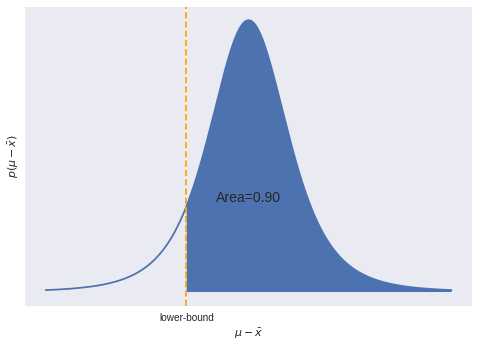

In [0]:
#make some points for plot
N = 5
x = np.linspace(-5,5, 1000)
T = ss.t.ppf(0.10, df=N-1)
y = ss.t.pdf(x, df=N-1)
plt.plot(x,y)  
plt.fill_between(x, y, where= x > T)
plt.text(0,np.max(y) / 3, 'Area=0.90', fontdict={'size':14}, horizontalalignment='center')
plt.axvline(T, linestyle='--', color='orange')
plt.xticks([T], ['lower-bound'])
plt.yticks([])
plt.ylabel(r'$p(\mu - \bar{x})$')
plt.xlabel(r'$\mu - \bar{x}$')
plt.show()

Interval inferior (fita superior)
--

Un interval inferior comprèn la part inferior x% de la densitat de probabilitat i es pot definir com l'interval $(-\infty,y)$, on y és una fita superior.  A continació es presenta un exemple:

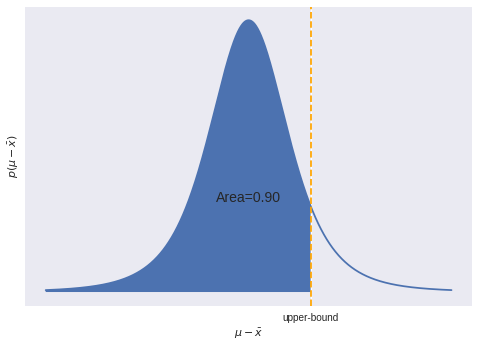

In [0]:
#make some points for plot
N = 5
x = np.linspace(-5,5, 1000)
T = ss.t.ppf(0.90, df=N-1)
y = ss.t.pdf(x, df=N-1)
plt.plot(x,y)  
plt.fill_between(x, y, where= x < T)
plt.text(0,np.max(y) / 3, 'Area=0.90', fontdict={'size':14}, horizontalalignment='center')
plt.axvline(T, linestyle='--', color='orange')
plt.xticks([T], ['upper-bound'])
plt.yticks([])
plt.ylabel(r'$p(\mu - \bar{x})$')
plt.xlabel(r'$\mu - \bar{x}$')
plt.show()

Exercici 7
===

Prenem una mostra de mida $N = 100$ i trobem $\bar{x} = 50$ i $\sigma_x = 10$. Calcula l'interval superior de confiança per $\mu$ amb un nivell del 95%.

Resposta
--

Volem $$P(-y < \bar{x} - \mu < \infty) = 0.95$$

Sabem que la probabilitat segueix $\cal{N}(0,\sigma_x/\sqrt{N})$

In [28]:
CI = 0.95
Z = scipy.stats.norm.ppf((1 - CI))
y = -Z*10/np.sqrt(100)
print("Z = {}".format(-Z))
print("y = {}".format(y))
print(50 - y)

Z = 1.6448536269514722
y = 1.6448536269514722
48.35514637304853


$$ y = \frac{10}{\sqrt{100}} 1.645 = 1.645$$

$\mu \in (48.36,\infty)$ amb un 90% de confiança.